In [1]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

from ROOT import TCanvas, TGraphErrors, TF1, TH1F, gStyle
from ROOT import gROOT
from array import array

Welcome to JupyROOT 6.16/00


In [2]:
def getValues(filename):
    try:
        file = open(filename, 'r')
    except IOError:
        print "Problem with the", filename
    data =[]
    for line in file:
        data.append(float(line))
    return data

In [3]:
data = getValues("data.txt")
print data

[0.0, 1.2, 2.0, 3.4, 6.1, 6.3, 7.1, 8.8, 12.3, 12.5, 13.1, 14.6, 14.8, 17.3, 17.9, 20.2, 22.9, 23.8, 24.2, 25.9, 27.3, 29.8, 30.7, 32.1, 32.5, 33.8, 34.7, 35.8, 36.8, 37.8, 39.4, 39.5, 40.7, 42.3, 44.8, 46.2, 46.9, 47.4, 49.1, 49.2, 49.3, 51.4, 52.4, 52.6, 53.5, 57.2, 58.6, 65.7, 66.2, 66.4, 66.7, 67.9, 69.4, 69.9, 71.5, 73.6, 73.8, 75.3, 76.1, 77.1, 79.4, 79.5, 80.2, 81.3, 82.1, 82.7, 83.5, 84.1, 85.3, 85.9, 86.0, 86.6, 87.4, 88.1, 88.8, 92.3, 92.8, 94.6, 95.0, 96.7, 96.9, 97.5, 100.2, 100.3, 100.4, 101.2, 101.8, 102.6, 103.0, 104.0, 104.9, 105.4, 107.7, 108.3, 110.6, 111.8, 112.5, 112.9, 113.2, 115.0]


In [4]:
n = [data[i+1]-data[i] for i in range(len(data)-1)]
n = np.around(n, decimals =1)
print(n)

[1.2 0.8 1.4 2.7 0.2 0.8 1.7 3.5 0.2 0.6 1.5 0.2 2.5 0.6 2.3 2.7 0.9 0.4
 1.7 1.4 2.5 0.9 1.4 0.4 1.3 0.9 1.1 1.  1.  1.6 0.1 1.2 1.6 2.5 1.4 0.7
 0.5 1.7 0.1 0.1 2.1 1.  0.2 0.9 3.7 1.4 7.1 0.5 0.2 0.3 1.2 1.5 0.5 1.6
 2.1 0.2 1.5 0.8 1.  2.3 0.1 0.7 1.1 0.8 0.6 0.8 0.6 1.2 0.6 0.1 0.6 0.8
 0.7 0.7 3.5 0.5 1.8 0.4 1.7 0.2 0.6 2.7 0.1 0.1 0.8 0.6 0.8 0.4 1.  0.9
 0.5 2.3 0.6 2.3 1.2 0.7 0.4 0.3 1.8]


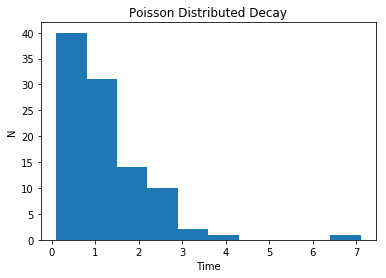

In [5]:
plt.figure()
plt.hist(n,10)
plt.ylabel("N")
plt.xlabel("Time")
plt.title("Poisson Distributed Decay")
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Info in <TCanvas::Print>: eps file hn_0.eps has been created


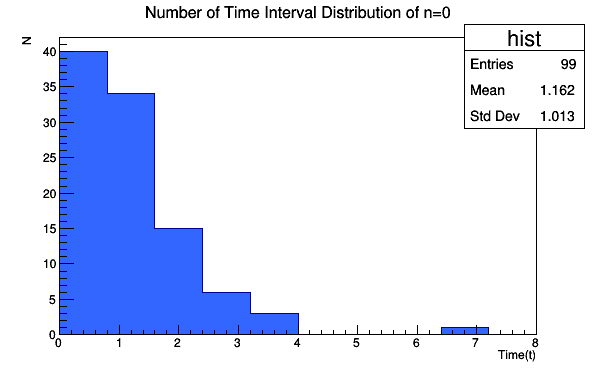

In [30]:
c1 = TCanvas( 'c1', 'Poisson Graph', 200, 10, 600, 400 ) 

hist = TH1F("hist", "Number of Time Interval Distribution of n=0", 10, 0, 8) 

hist.GetYaxis().SetTitle("N")
hist.GetXaxis().SetTitle ("Time(t)")
hist.SetFillColor(858)

for data_point in n:
    hist.Fill(data_point)

hist.Draw()
c1.Draw()
c1.SaveAs("hn_0.eps")


 FCN=4.43653 FROM MIGRAD    STATUS=CONVERGED      51 CALLS          52 TOTAL
                     EDM=6.5061e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.05499e+01   8.36588e+00   9.43055e-03  -1.73701e-06
   2  p1           7.45820e-01   9.61354e-02   1.08370e-04   3.22899e-04


Info in <TCanvas::Print>: eps file fn_0.eps has been created


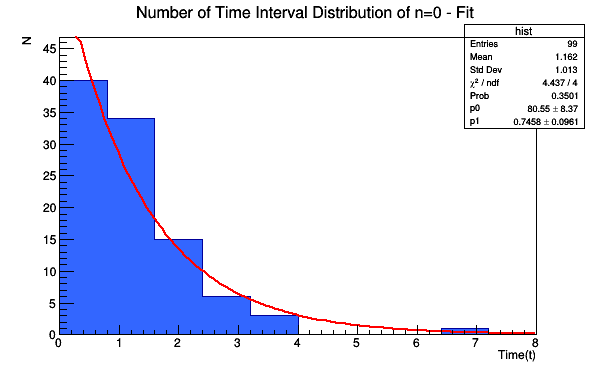

In [31]:
f= TF1("f","[0]*[1]*TMath::Exp(-[1]*x)",0,8) #(Change interval values (60,120) according to your data sets!!!)


f.SetParameters(0.8, 1, 1.3)
f.SetFillColor(41);
hist.Fit("f")
hist.SetTitle("Number of Time Interval Distribution of n=0 - Fit")

gStyle.SetOptFit(1111)

c1.Draw()
c1.SaveAs("fn_0.eps")

In [8]:
n1 = [data[i+2]-data[i] for i in range(len(data)-2)]
n1= np.around(n1, decimals =1)
n1

array([2. , 2.2, 4.1, 2.9, 1. , 2.5, 5.2, 3.7, 0.8, 2.1, 1.7, 2.7, 3.1,
       2.9, 5. , 3.6, 1.3, 2.1, 3.1, 3.9, 3.4, 2.3, 1.8, 1.7, 2.2, 2. ,
       2.1, 2. , 2.6, 1.7, 1.3, 2.8, 4.1, 3.9, 2.1, 1.2, 2.2, 1.8, 0.2,
       2.2, 3.1, 1.2, 1.1, 4.6, 5.1, 8.5, 7.6, 0.7, 0.5, 1.5, 2.7, 2. ,
       2.1, 3.7, 2.3, 1.7, 2.3, 1.8, 3.3, 2.4, 0.8, 1.8, 1.9, 1.4, 1.4,
       1.4, 1.8, 1.8, 0.7, 0.7, 1.4, 1.5, 1.4, 4.2, 4. , 2.3, 2.2, 2.1,
       1.9, 0.8, 3.3, 2.8, 0.2, 0.9, 1.4, 1.4, 1.2, 1.4, 1.9, 1.4, 2.8,
       2.9, 2.9, 3.5, 1.9, 1.1, 0.7, 2.1])

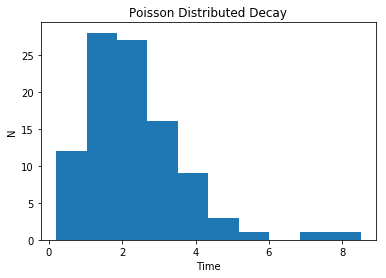

In [9]:
plt.figure()
plt.hist(n1,10)
plt.ylabel("N")
plt.xlabel("Time")
plt.title("Poisson Distributed Decay")
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Info in <TCanvas::Print>: eps file hn_1.eps has been created


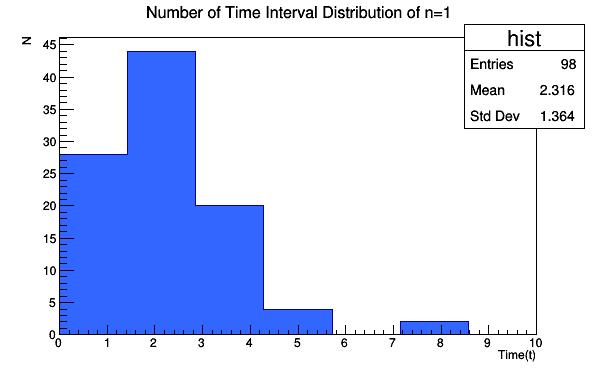

In [33]:
c2 = TCanvas( 'c2', 'Poisson Graph', 200, 10, 600, 400 ) 

hist = TH1F("hist", "Number of Time Interval Distribution of n=1", 7, 0, 10) 

hist.GetYaxis().SetTitle("N")
hist.GetXaxis().SetTitle ("Time(t)")
hist.SetFillColor(858)

for data_point in n1:
    hist.Fill(data_point)

hist.Draw()
c2.Draw()
c2.SaveAs("hn_1.eps")

 FCN=8.24459 FROM MIGRAD    STATUS=CONVERGED     115 CALLS         116 TOTAL
                     EDM=5.18475e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.26937e+02   1.35820e+01   1.98882e-02   5.16751e-06
   2  p1           8.12943e-01   6.04419e-02   8.89698e-05   5.39332e-03


Info in <TCanvas::Print>: eps file fn_1.eps has been created


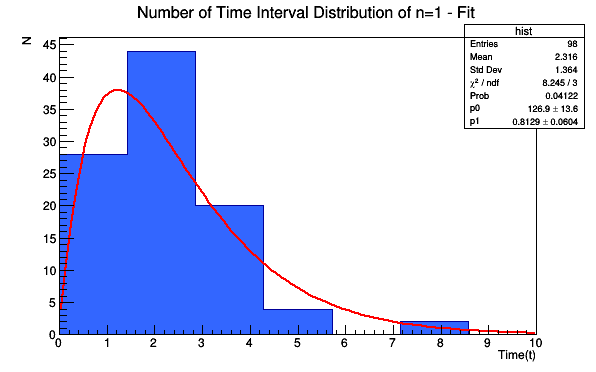

In [34]:
f= TF1("f","[0]*TMath::Power([1],2)*x*TMath::Exp(-[1]*x)",0,10)

f.SetParameters(1,2,3)
f.SetFillColor(41);
hist.Fit("f")
hist.SetTitle("Number of Time Interval Distribution of n=1 - Fit")

gStyle.SetOptFit(1111)

c2.Draw()
c2.SaveAs("fn_1.eps")